# Stellar micro-lensing simulation

In this notebook, we simulate and animate stellar micro-lensing events.
Lentstronomy does not perform any approximations to speed up the calculation and is capable to compute micro-lensing events of arbitrary complexities

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
# define the microlens

# =========
# distances
# =========

d_l = 4000  # distance of the lens in pc
d_s = 8000  # distance of the source in pc

# ===========
# lens system
# ===========

M0 = 0.01  # mass of the main lens in units of M_sol

M1 = 0.01  # secondary mass of the lens
d_01 = 1  # distance of M0 to M1 in units of AU

# ===========
# source size
# ===========

diameter_s = 1  # size of the radius of the source star in units of the solar radius


In [27]:
# compute lensing properties
from lenstronomy.Cosmo.micro_lensing import einstein_radius, source_size

theta_E = einstein_radius(M0, d_l, d_s)
print(theta_E, 'Einstein radius [arc seconds]')

size_s = source_size(diameter_s, d_s)
print(size_s, 'source size in arc seconds')

0.00010090910723578977 Einstein radius [arc seconds]
1.163118159836867e-06 source size in arc seconds


In [28]:
# compute ray-tracing grid

grid_scale = size_s / 4.  # ten times the source size resolution
grid_width = theta_E * 4
num_pix = int(grid_width / grid_scale)
print(num_pix)

from lenstronomy.Util import util
x, y = util.make_grid(numPix=num_pix, deltapix=grid_scale)

1388


In [33]:
# map image to source plane
from lenstronomy.LensModel.lens_model import LensModel
lens = LensModel(lens_model_list=['POINT_MASS'])
kwargs_lens = [{'theta_E': theta_E, 'center_x': 0, 'center_y': 0}]

beta_x, beta_y = lens.ray_shooting(x, y, kwargs=kwargs_lens)

# compute surface brightness
from lenstronomy.LightModel.light_model import LightModel
ligth = LightModel(light_model_list=['ELLIPSOID'])
kwargs_light = [{'amp': 1, 'radius': size_s/2 * 10, 'e1': 0, 'e2': 0, 'center_x': 0 + theta_E/4, 'center_y': 0}]

surface_brightness = ligth.surface_brightness(beta_x, beta_y, kwargs_light)
print(np.sum(surface_brightness))

image = util.array2image(surface_brightness)


48431980372919.234


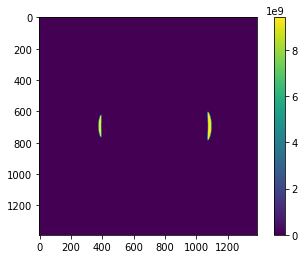

In [34]:
plt.imshow(image)
plt.colorbar()
plt.show()